# Simple CNN

simple CNN without specific update

# Import library

In [ ]:
import torch
from torch.utils.data import DataLoader
from torch import nn, optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import torch.nn.functional as F

# Define transformations
Here, transformation pipelines are defined for both training and testing data. 
The "transforms.Compose" function allows you to chain together multiple transformations. 

In this case, ToTensor() converts images to PyTorch tensors, and Normalize() standardizes pixel values to have a mean of 0.5 and a standard deviation of 0.5.

In [ ]:
# Define transformations for training and testing
train_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Data loading

The CIFAR100 dataset is loaded using the datasets.CIFAR100 class. 

The train_dataset is loaded with the training split, while the test_dataset is loaded with the testing split. 

The transform argument specifies the transformation pipeline to apply to the images, and download=True ensures that the dataset is downloaded if not present.

In [ ]:
# Load the CIFAR100 dataset
train_dataset = datasets.CIFAR100(
    root='data',
    train=True,
    transform=train_transform,
    download=True
)

test_dataset = datasets.CIFAR100(
    root='data',
    train=False,
    transform=test_transform,
    download=True
)

# Define CNN model

The CIFAR100 dataset is loaded using the "datasets.CIFAR100 class". 

The train_dataset is loaded with the training split, while the test_dataset is loaded with the testing split. 

The transform argument specifies the transformation pipeline to apply to the images, and download=True ensures that the dataset is downloaded if not present.

hyperparameters for the training process are defined, including the batch size, learning rate, and the number of training epochs.

A simple CNN model is defined using the nn.Module class as the base. The model consists of a single convolutional layer (conv1) followed by a ReLU activation (relu1) and max-pooling (pool). The output is flattened and passed through a fully connected layer (fc1). Finally, a log-softmax activation is applied to the output. An instance of this model is created as model.

The loss function (criterion) is set to Cross-Entropy Loss, suitable for multiclass classification tasks. The optimizer (optimizer) is defined as Adam, which will update the model parameters based on computed gradients during training. We prefered Adam in this session because it appears to be faster while getting good results than others.

"DataLoader" objects are created for both the training and testing datasets. 
These loaders provide an efficient way to iterate through the dataset in batches. 
The shuffle argument is set to True for the training loader to shuffle the data during each epoch.

In [ ]:
# Set the model and training parameters
batch_size = 64
learning_rate = 0.001
num_epochs = 30

# Define CNN model
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.relu1 = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(16 * 16 * 32, 100)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.pool(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = F.log_softmax(x, dim=1)
        return x

# Instantiate the simple CNN model
model = SimpleCNN()

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Load the data using DataLoaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Define evaluate function

The evaluate function calculates the loss and accuracy of the model on a given dataloader. It sets the model to evaluation mode using model.eval(), computes the loss, and accumulates the number of correctly predicted samples and the total number of samples. The function returns the average loss and accuracy.

The train function handles the training loop. It sets the model to training mode using model.train(), computes the loss and gradients, updates the model parameters using the optimizer, and tracks loss and accuracy metrics.

The model is trained using a loop that iterates over the specified number of epochs (num_epochs). In each epoch, the train function is called to train the model on the training data, and the evaluate function is used

In [ ]:
# Define the evaluation function
def evaluate(model, dataloader, criterion):
    model.eval()
    total_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in dataloader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            total_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    accuracy = 100.0 * correct / total
    avg_loss = total_loss / len(dataloader)
    return avg_loss, accuracy

# Define the training function
def train(model, dataloader, criterion, optimizer):
    model.train()
    total_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in dataloader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    accuracy = 100.0 * correct / total
    avg_loss = total_loss / len(dataloader)
    return avg_loss, accuracy

# Train the model
train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []

for epoch in range(num_epochs):
    train_loss, train_accuracy = train(model, train_loader, criterion, optimizer)
    test_loss, test_accuracy = evaluate(model, test_loader, criterion)

    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.2f}, Train Accuracy: {train_accuracy:.2f}%, Test Loss: {test_loss:.2f}, Test Accuracy: {test_accuracy:.2f}%')



# Plotting results

Files already downloaded and verified
Files already downloaded and verified
Epoch [1/30], Train Loss: 3.33, Train Accuracy: 23.01%, Test Loss: 2.97, Test Accuracy: 29.53%
Epoch [2/30], Train Loss: 2.61, Train Accuracy: 36.80%, Test Loss: 2.82, Test Accuracy: 32.44%
Epoch [3/30], Train Loss: 2.24, Train Accuracy: 44.55%, Test Loss: 2.78, Test Accuracy: 34.19%
Epoch [4/30], Train Loss: 1.95, Train Accuracy: 50.86%, Test Loss: 2.79, Test Accuracy: 34.17%
Epoch [5/30], Train Loss: 1.69, Train Accuracy: 56.84%, Test Loss: 2.89, Test Accuracy: 33.73%
Epoch [6/30], Train Loss: 1.47, Train Accuracy: 61.84%, Test Loss: 2.93, Test Accuracy: 34.88%
Epoch [7/30], Train Loss: 1.28, Train Accuracy: 66.79%, Test Loss: 3.03, Test Accuracy: 34.68%
Epoch [8/30], Train Loss: 1.10, Train Accuracy: 71.26%, Test Loss: 3.14, Test Accuracy: 35.00%
Epoch [9/30], Train Loss: 0.95, Train Accuracy: 75.49%, Test Loss: 3.28, Test Accuracy: 34.54%
Epoch [10/30], Train Loss: 0.81, Train Accuracy: 78.76%, Test Loss: 3

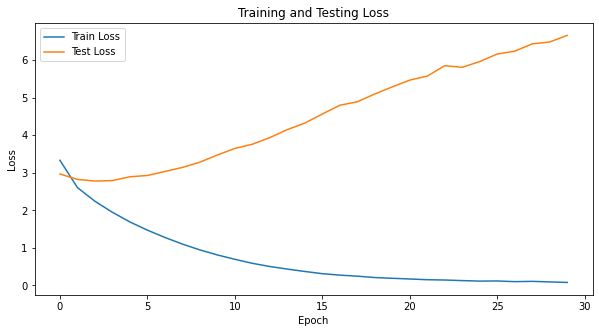

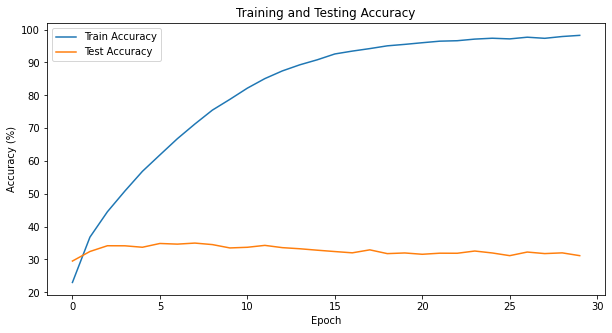

In [2]:


# Plotting performance curves
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Testing Loss')
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.title('Training and Testing Accuracy')
plt.show()


# Result

There is a significant difference between the model's performance on the training data and its performance on the test data. This gap suggests that the model is not capturing the true underlying relationships.
This simple CNN is highly overfitted.

Regularization techniques, such as dropout, weight decay, and batch normalization, should help to prevent overfitting by introducing penalties for complex model behavior.

We will create a more complex CNN in the final model.